In [7]:
# I run the code in interactive shell

# Question 0 -Slurm

The result of the shell

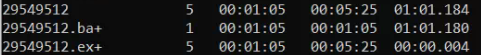

# Question 1 - tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
import pandas as pd
# ele=pd.read_csv("unique_m.csv")
# data=data.merge(ele,how="inner",left_index=True,right_index=True)
# data=data.drop(['critical_temp_y',"material"],axis=1)

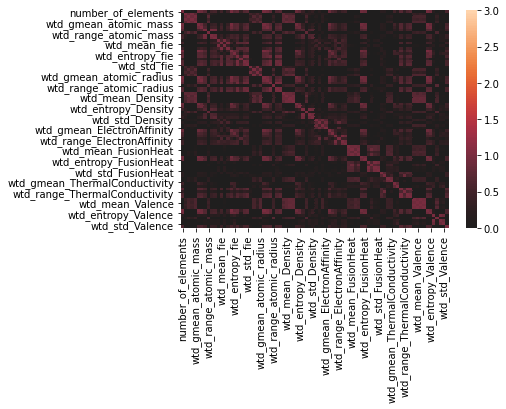

In [3]:
import seaborn
data=pd.read_csv("train.csv")
cor=data.corr()
seaborn.heatmap(cor,vmin=0,vmax=3,center=0)
dic=cor['critical_temp'].abs().to_dict()
feat=sorted(dic.items(),key=lambda x:x[1],reverse=True)
cols=[i[0] for i in feat]

In [7]:
def split_x_y(data,label='critical_temp'):
    x=data.drop(label,axis=1)
    y=data[label]
    return x.values,y.values
data=pd.read_csv("train.csv")
train,test=train_test_split(data,test_size=0.2,shuffle=True)
test,valid=train_test_split(test,test_size=0.5)
x_train,y_train=split_x_y(train)
x_test,y_test=split_x_y(test)
x_valid,y_valid=split_x_y(valid)



## model1 Three layer

In [46]:
model1 = keras.models.Sequential([
  Dense(20, activation='sigmoid'),
  Dense(10, activation='relu'),
  Dense(1, activation='relu')
])
model1.compile(optimizer='adam',
              loss='MSE',
              metrics=['MSE'])
model1.fit(x_train, y_train, epochs=10)

model1.evaluate(x_valid,  y_valid, verbose=2)

Epoch 1/10
532/532 [==============================] - 1s 940us/step - loss: 2036.8828 - MSE: 2036.8828
Epoch 2/10
532/532 [==============================] - 1s 952us/step - loss: 1302.7134 - MSE: 1302.7134
Epoch 3/10
532/532 [==============================] - 0s 932us/step - loss: 843.5767 - MSE: 843.5767
Epoch 4/10
532/532 [==============================] - 0s 915us/step - loss: 700.4167 - MSE: 700.4167
Epoch 5/10
532/532 [==============================] - 0s 938us/step - loss: 685.3168 - MSE: 685.3168
Epoch 6/10
532/532 [==============================] - 0s 931us/step - loss: 679.2064 - MSE: 679.2064
Epoch 7/10
532/532 [==============================] - 0s 902us/step - loss: 667.5625 - MSE: 667.5625
Epoch 8/10
532/532 [==============================] - 0s 902us/step - loss: 670.1608 - MSE: 670.1608
Epoch 9/10
532/532 [==============================] - 0s 855us/step - loss: 678.2340 - MSE: 678.2340
Epoch 10/10
532/532 [==============================] - 0s 901us/step - loss: 676.2629 -

[688.9701538085938, 688.9701538085938]

## model2 two layers

In [47]:
model2 = keras.models.Sequential([
  Dense(15,activation="sigmoid"),
  Dense(1, activation='relu')
])
model2.compile(optimizer='Adam',
              loss='MSE',
              metrics=['MSE'])
model2.fit(x_train, y_train, epochs=10)
model2.evaluate(x_valid,  y_valid, verbose=2)

Epoch 1/10
532/532 [==============================] - 1s 901us/step - loss: 2049.5557 - MSE: 2049.5557
Epoch 2/10
532/532 [==============================] - 0s 806us/step - loss: 1744.4097 - MSE: 1744.4097
Epoch 3/10
532/532 [==============================] - 0s 824us/step - loss: 1517.7911 - MSE: 1517.7911
Epoch 4/10
532/532 [==============================] - 0s 799us/step - loss: 1328.9589 - MSE: 1328.9589
Epoch 5/10
532/532 [==============================] - 0s 805us/step - loss: 1178.7710 - MSE: 1178.7710
Epoch 6/10
532/532 [==============================] - 0s 802us/step - loss: 1064.1606 - MSE: 1064.1606
Epoch 7/10
532/532 [==============================] - 0s 801us/step - loss: 971.7383 - MSE: 971.7383
Epoch 8/10
532/532 [==============================] - 0s 826us/step - loss: 961.7974 - MSE: 961.7974
Epoch 9/10
532/532 [==============================] - 0s 832us/step - loss: 920.7902 - MSE: 920.7902
Epoch 10/10
532/532 [==============================] - 0s 818us/step - loss: 87

[883.5693359375, 883.5693359375]

## model3 l1 l2 regularizers

In [48]:
model3 = keras.models.Sequential([
  Dense(40, activation='sigmoid',kernel_regularizer=keras.regularizers.L1L2(0.01)),
Dense(10, activation='sigmoid',kernel_regularizer=keras.regularizers.L1L2(0.01)),
  Dense(1, activation='relu',kernel_regularizer=keras.regularizers.L1L2(0.02))
])
model3.compile(optimizer='adam',
              loss='MSE',
              metrics=['MSE'])
model3.fit(x_train, y_train, epochs=10)

model3.evaluate(x_valid, y_valid, verbose=2)

Epoch 1/10
532/532 [==============================] - 1s 998us/step - loss: 2078.7473 - MSE: 2076.7297
Epoch 2/10
532/532 [==============================] - 0s 921us/step - loss: 1850.0062 - MSE: 1848.4569
Epoch 3/10
532/532 [==============================] - 0s 916us/step - loss: 1686.3623 - MSE: 1684.8636
Epoch 4/10
532/532 [==============================] - 0s 928us/step - loss: 1520.9379 - MSE: 1519.0128
Epoch 5/10
532/532 [==============================] - 0s 910us/step - loss: 1330.6582 - MSE: 1328.4248
Epoch 6/10
532/532 [==============================] - 0s 908us/step - loss: 1163.5306 - MSE: 1161.1333
Epoch 7/10
532/532 [==============================] - 0s 852us/step - loss: 1039.3333 - MSE: 1036.7892
Epoch 8/10
532/532 [==============================] - 0s 860us/step - loss: 947.8208 - MSE: 945.1271
Epoch 9/10
532/532 [==============================] - 0s 921us/step - loss: 871.9620 - MSE: 869.1167
Epoch 10/10
532/532 [==============================] - 0s 933us/step - loss: 

[800.9945068359375, 797.9976196289062]

## model4 two layers plus dropout

In [49]:
model4 = keras.models.Sequential([
  Dense(190, activation='sigmoid',kernel_regularizer=keras.regularizers.L1L2(0.01)),
  Dropout(0.1),
  Dense(1, activation='relu',kernel_regularizer=keras.regularizers.L1L2(0.02))
])
model4.compile(optimizer='adam',
              loss='MSE',
              metrics=['MSE'])
model4.fit(x_train, y_train, epochs=10)

model4.evaluate(x_valid, y_valid, verbose=2)

Epoch 1/10
532/532 [==============================] - 1s 1ms/step - loss: 1204.4875 - MSE: 1199.4868
Epoch 2/10
532/532 [==============================] - 1s 1ms/step - loss: 742.7103 - MSE: 738.0234
Epoch 3/10
532/532 [==============================] - 1s 1ms/step - loss: 717.4576 - MSE: 712.4300
Epoch 4/10
532/532 [==============================] - 1s 1ms/step - loss: 721.2117 - MSE: 715.9894
Epoch 5/10
532/532 [==============================] - 1s 1ms/step - loss: 700.3258 - MSE: 695.0543
Epoch 6/10
532/532 [==============================] - 1s 1ms/step - loss: 697.0251 - MSE: 691.6979
Epoch 7/10
532/532 [==============================] - 1s 1ms/step - loss: 692.2310 - MSE: 686.8311
Epoch 8/10
532/532 [==============================] - 1s 1ms/step - loss: 687.6240 - MSE: 682.2551
Epoch 9/10
532/532 [==============================] - 1s 1ms/step - loss: 691.8318 - MSE: 686.3872
Epoch 10/10
532/532 [==============================] - 1s 1ms/step - loss: 702.3664 - MSE: 696.8629
67/67 -

[703.0377807617188, 697.4962158203125]

## model5 four dense layers and four BN layers with l1l2 regularizers 

In [50]:
model5 = keras.models.Sequential([
    Dense(8, activation='sigmoid',kernel_regularizer=keras.regularizers.L1L2(0.01)),
    BatchNormalization(),
    Dense(3, activation='leaky_relu',kernel_regularizer=keras.regularizers.L1L2(0.01)),
    BatchNormalization(),
    Dropout(0.01),
    Dense(1,activation='gelu',kernel_regularizer=keras.regularizers.L1L2(0.01))
])
model5.compile(keras.optimizers.Adam(),
              loss='MSE',
              metrics=['MSE'])
model5.fit(x_train, y_train, epochs=10)

model5.evaluate(x_valid,  y_valid,verbose=2)

Epoch 1/10
532/532 [==============================] - 1s 1ms/step - loss: 2158.6853 - MSE: 2158.0085
Epoch 2/10
532/532 [==============================] - 1s 1ms/step - loss: 1592.1788 - MSE: 1591.5588
Epoch 3/10
532/532 [==============================] - 1s 1ms/step - loss: 1126.1967 - MSE: 1125.5894
Epoch 4/10
532/532 [==============================] - 1s 1ms/step - loss: 861.4737 - MSE: 860.8720
Epoch 5/10
532/532 [==============================] - 1s 1ms/step - loss: 785.0132 - MSE: 784.4220
Epoch 6/10
532/532 [==============================] - 1s 1ms/step - loss: 744.1037 - MSE: 743.5228
Epoch 7/10
532/532 [==============================] - 1s 1ms/step - loss: 737.1541 - MSE: 736.5759
Epoch 8/10
532/532 [==============================] - 1s 1ms/step - loss: 721.0543 - MSE: 720.4846
Epoch 9/10
532/532 [==============================] - 1s 1ms/step - loss: 708.0137 - MSE: 707.4542
Epoch 10/10
532/532 [==============================] - 1s 1ms/step - loss: 706.6825 - MSE: 706.1251
67/

[705.1289672851562, 704.57666015625]

The best performing model is simple three layers model with achitecture  :like this<br>
Dense(20, activation='sigmoid'),<br>
Dense(10, activation='relu'),<br>
Dense(1, activation='relu')<br>

The MSE of the best model as below


In [41]:
model1.evaluate(x_test,  y_test)

67/67 [==============================] - 0s 939us/step - loss: 719.2114 - MSE: 718.7217


[719.2113647460938, 718.7216796875]

# Question2 PySpark and hdfs

![title](PS8Output.png)

In [6]:
pd.read_csv("ps8_q2_mengtona_results.csv")

,Unnamed: 0,count,SUM of area,mean of area
0,0,499919,2.000199e+09,4001.046487
1,1,499919,1.028045e+09,2058.691588
